In [24]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

import pandas as pd
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv('AutoInsurance.csv')

In [26]:
df['Number of Open Complaints'].unique()

array([0, 2, 1, 3, 5, 4], dtype=int64)

In [27]:
df = df.drop(['Customer', 'State', 'Response', 'Effective To Date', 'Gender', 'Policy', 'Sales Channel', 'Location Code', 'Renew Offer Type', 'Monthly Premium Auto', 'Customer Lifetime Value', 'Number of Open Complaints', 'Coverage', 'Vehicle Size', 'Policy Type', 'Number of Policies'], axis=1)

In [28]:
encoder_Education = preprocessing.LabelEncoder()
df['Education'] = encoder_Education.fit_transform(df['Education'])
encoder_EmploymentStatus = preprocessing.LabelEncoder()
df['EmploymentStatus'] = encoder_EmploymentStatus.fit_transform(df['EmploymentStatus'])
encoder_VehicleClass = preprocessing.LabelEncoder()
df['Vehicle Class'] = encoder_VehicleClass.fit_transform(df['Vehicle Class'])
encoder_MaritalStatus = preprocessing.LabelEncoder()
df['Marital Status'] = encoder_MaritalStatus.fit_transform(df['Marital Status'])

In [29]:
df.head()

,Education,EmploymentStatus,Income,Marital Status,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount,Vehicle Class
0,0,1,56274,1,32,5,384.811147,5
1,0,4,0,2,13,42,1131.464935,0
2,0,1,48767,1,18,38,566.472247,5
3,0,4,0,1,18,65,529.881344,3
4,0,1,43836,2,12,44,138.130879,0


In [30]:
df.drop(['Months Since Last Claim', 'Months Since Policy Inception', 'Total Claim Amount'], axis=1, inplace=True)

In [31]:
df.describe()

,Education,EmploymentStatus,Income,Marital Status,Vehicle Class
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,1.554084,1.825706,37657.380009,1.120210,1.892380
std,1.381978,1.347793,30379.904734,0.636838,2.072992
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000
50%,1.000000,1.000000,33889.500000,1.000000,0.000000
75%,3.000000,4.000000,62320.000000,2.000000,4.000000
max,4.000000,4.000000,99981.000000,2.000000,5.000000


In [32]:
k_means_model = KMeans(n_clusters=4)
k_means_model.fit(df)

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [33]:
k_means_model.cluster_centers_

array([[1.59645764e+00, 1.00000000e+00, 5.60008186e+04, 1.03063667e+00,
        1.84729536e+00],
       [1.51370399e+00, 3.77290525e+00, 1.16173571e+03, 1.44909945e+00,
        1.89545810e+00],
       [1.54694323e+00, 1.16739447e+00, 2.85591841e+04, 9.66885007e-01,
        1.88427948e+00],
       [1.57372347e+00, 1.00000000e+00, 8.34934527e+04, 9.87378084e-01,
        1.95467585e+00]])

In [34]:
labels = ['Cliente trabajador promedio', 'Cliente Posibilidades Limitadas', 'Cliente Sobreviviente Soltero', 'Cliente Soltero Amasador de Fortunas']

In [35]:
centers = range(1, 9)
clusters = [KMeans(n_clusters=center) for center in centers]
scores = [clusters[index].fit(df).score(df) for index in range(len(clusters))]

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

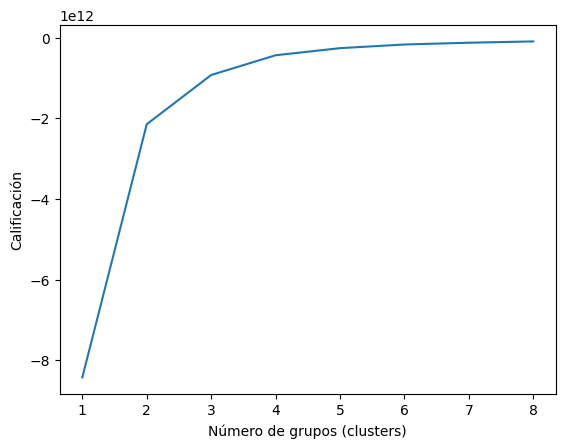

In [36]:
plt.plot(centers, scores)
plt.xlabel('Número de grupos (clusters)')
plt.ylabel('Calificación')
plt.show()

In [39]:
df_labels = pd.DataFrame(k_means_model.labels_)
df_labels[0].unique()

array([0, 1, 2, 3])

In [38]:
education = 0
employment_Status = 1
income = 25000
marital_status = 2
vehicle_class = 0
predicted = k_means_model.predict([[education, employment_Status, income, marital_status, vehicle_class]])
print(f'Un cliente con educacion {encoder_Education.classes_[education]}, estado de empleo {encoder_EmploymentStatus.classes_[employment_Status]}, ingresos de ${income}, estado marital {encoder_MaritalStatus.classes_[marital_status]}, y tipo de vehiculo {encoder_VehicleClass.classes_[vehicle_class]} es un cliente de tipo: {labels[predicted[0]]}')

Un cliente con educacion Bachelor, estado de empleo Employed, ingresos de $25000, estado marital Single, y tipo de vehiculo Four-Door Car es un cliente de tipo: Cliente Sobreviviente Soltero


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
